**I'm creating on an artificial intelligence project that detects Fake Instagram Followers. I'll create a Python script that retrieves followers from an Instagram account that a user has entered, saves its data features to a CSV file, and then uses our ML model to show the percentage of fake followers the account has. I'll use data of real and fake followers to train our machine learning model.**

In [83]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [84]:
rawdata=pd.read_csv("train.csv") # I got this data from internet it consists of fake and real followers
#Data Description: Understand the meaning of each column in the dataset. Here's a brief description based on the provided column names:

#    Profile pic: Indicates whether the profile has a profile picture (1 for yes, 0 for no).
#    Nums/length username: Ratio or length of numbers in the username.
#   Fullname words: Number of words in the fullname.
#    Nums/length fullname: Ratio or length of numbers in the fullname.
#    Name==username: Indicates if the username is the same as the name (1 for yes, 0 for no).
#    Description length: Length of the description in the profile.
#    External URL: Indicates if there's an external URL in the profile (1 for yes, 0 for no).
#    Private: Indicates if the profile is private (1 for yes, 0 for no).
    #posts: Number of posts made by the account.
    #followers: Number of followers of the account.
    #follows: Number of accounts the profile is following.
#    Fake: Indicates if the account is fake (1 for yes, 0 for no).

In [85]:
rawdata.info() , rawdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


(None,
        profile pic  nums/length username  fullname words  \
 count   576.000000            576.000000      576.000000   
 mean      0.701389              0.163837        1.460069   
 std       0.458047              0.214096        1.052601   
 min       0.000000              0.000000        0.000000   
 25%       0.000000              0.000000        1.000000   
 50%       1.000000              0.000000        1.000000   
 75%       1.000000              0.310000        2.000000   
 max       1.000000              0.920000       12.000000   
 
        nums/length fullname  name==username  description length  external URL  \
 count            576.000000      576.000000          576.000000    576.000000   
 mean               0.036094        0.034722           22.623264      0.116319   
 std                0.125121        0.183234           37.702987      0.320886   
 min                0.000000        0.000000            0.000000      0.000000   
 25%                0.000000    

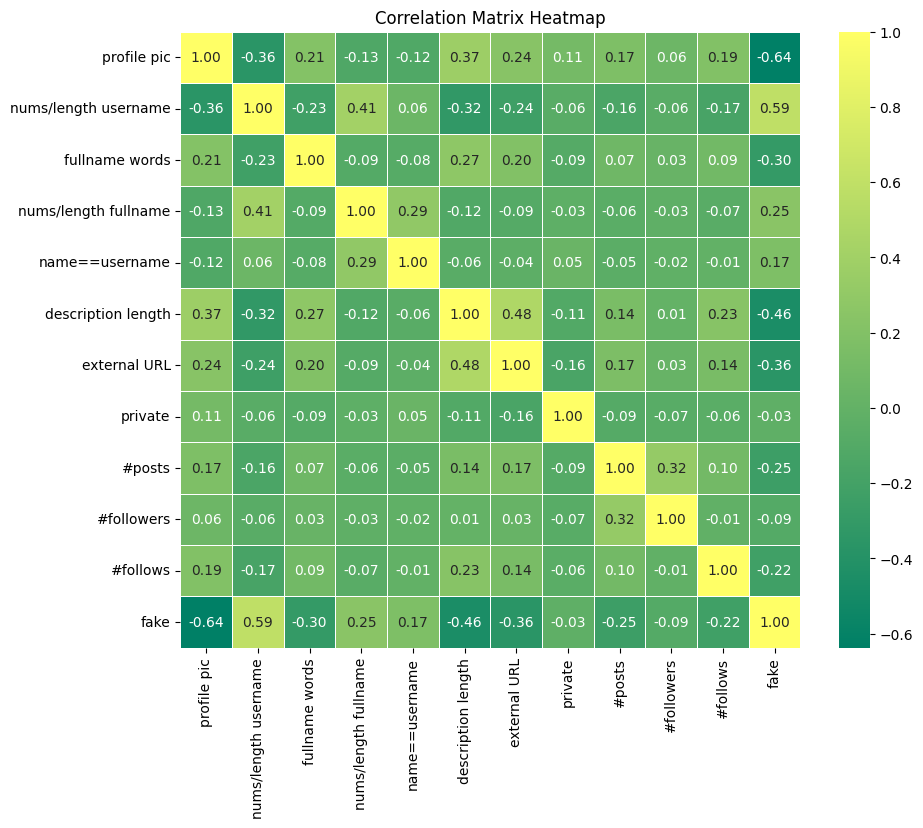

In [86]:
correlationmatrix = rawdata.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationmatrix, annot=True, cmap='summer', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [87]:
#creating new data set of features that are relevant and can be fetched with our python script 
data=rawdata[["nums/length username", "#posts", "#followers", "#follows", "fake"]].rename(columns={
    "nums/length username": "numsinusername",
    "#posts": "posts",
    "#followers": "followers",
    "#follows": "following",
    "fake": "fake"
})

In [88]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   numsinusername  576 non-null    float64
 1   posts           576 non-null    int64  
 2   followers       576 non-null    int64  
 3   following       576 non-null    int64  
 4   fake            576 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 22.6 KB


(None,
        numsinusername        posts     followers    following        fake
 count      576.000000   576.000000  5.760000e+02   576.000000  576.000000
 mean         0.163837   107.489583  8.530724e+04   508.381944    0.500000
 std          0.214096   402.034431  9.101485e+05   917.981239    0.500435
 min          0.000000     0.000000  0.000000e+00     0.000000    0.000000
 25%          0.000000     0.000000  3.900000e+01    57.500000    0.000000
 50%          0.000000     9.000000  1.505000e+02   229.500000    0.500000
 75%          0.310000    81.500000  7.160000e+02   589.500000    1.000000
 max          0.920000  7389.000000  1.533854e+07  7500.000000    1.000000)

In [89]:
# creating a new columns using Pandas to get the ratio of followings/followers as bots have higher ratio
# adding a feature biolength as real accounts have bio 
data["ratio"]=data["following"]/data["followers"]
data['biolength'] = np.where(data['fake'] == 0, np.random.randint(10, 151, size=len(data)), np.random.randint(0, 11, size=len(data)))
traindata=data #creating training data to export it as I have one more data set of my own account that has 100% real followers 
data["fake"]=data.pop("fake")
traindata

,numsinusername,posts,followers,following,ratio,biolength,fake
0,0.27,32,1000,955,0.955000,72,0
1,0.00,286,2740,533,0.194526,105,0
2,0.10,13,159,98,0.616352,61,0
3,0.00,679,414,651,1.572464,105,0
4,0.00,6,151,126,0.834437,141,0
...,...,...,...,...,...,...,...
571,0.55,33,166,596,3.590361,7,1
572,0.38,44,66,75,1.136364,9,1
573,0.57,4,96,339,3.531250,6,1
574,0.57,0,57,73,1.280702,6,1


In [90]:
traindatanew= pd.read_csv("traindatacombined.csv")

traindatanew

,numsinusername,posts,followers,following,ratio,biolength,fake
0,0.270000,32,1000,955,0.955000,75,0
1,0.000000,286,2740,533,0.194526,66,0
2,0.100000,13,159,98,0.616352,75,0
3,0.000000,679,414,651,1.572464,66,0
4,0.000000,6,151,126,0.834437,79,0
...,...,...,...,...,...,...,...
723,0.000000,3,198,470,2.373737,82,0
724,0.000000,52,2215,746,0.336795,129,0
725,8.333333,9,0,1,0.000000,65,1
726,17.391304,3,9,0,0.000000,84,1


<Axes: >

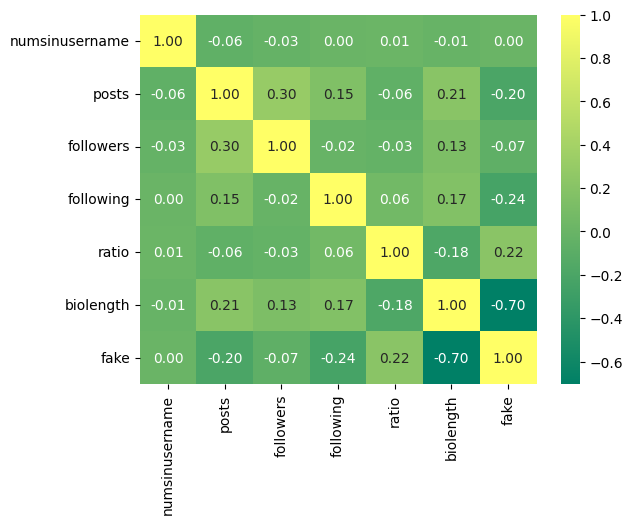

In [91]:
traindatanew['ratio'].fillna(traindatanew['ratio'].mean(), inplace=True) #filling na in ratio with mean
traindatanew.rename(columns={"biolentgh":"biolength"},inplace=True)
plt.figure()
sns.heatmap(traindatanew.corr(),annot=True,cmap="summer", fmt=".2f")

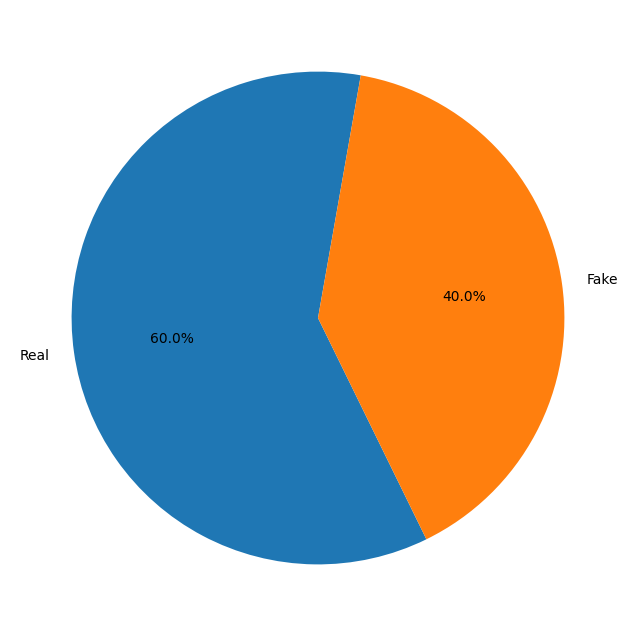

,numsinusername,posts,followers,following,ratio,biolength
0,0.270000,32,1000,955,0.955000,75
1,0.000000,286,2740,533,0.194526,66
2,0.100000,13,159,98,0.616352,75
3,0.000000,679,414,651,1.572464,66
4,0.000000,6,151,126,0.834437,79
...,...,...,...,...,...,...
723,0.000000,3,198,470,2.373737,82
724,0.000000,52,2215,746,0.336795,129
725,8.333333,9,0,1,0.000000,65
726,17.391304,3,9,0,0.000000,84


In [92]:
#Splitting Data into train and test
X= traindatanew.drop(columns=["fake"])
Y=traindatanew["fake"]
fake_counts = traindatanew['fake'].value_counts()
# Createing pie chart to see amount of fake and real accounts in our dataset
plt.figure(figsize=(8, 8))
plt.pie(fake_counts, labels=['Real', 'Fake'], autopct='%1.1f%%', startangle=80)
plt.show()

#filling infinity values with mean using NumPy
X[np.isinf(X)] = np.nan
np.any(np.isinf(X))
X.isna().sum()
X['ratio'].fillna(X['ratio'].mean(), inplace=True)
X

We know that our dataset has 40% fake followers, now test our model.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
svc= SVC()
np.random.seed(42)
rf=RandomForestClassifier()
lr= LogisticRegression()
xtrain,xtest,ytrain,ytest= train_test_split(X,Y, test_size=0.20, random_state=42)

In [94]:
X[np.isinf(X)] = np.nan
np.any(np.isinf(X))
X.isna().sum()
X['ratio'].fillna(X['ratio'].mean(), inplace=True)
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
percentage_fake_followers = (sum(pred) / len(pred)) * 100
print("Percentage of fake followers:", percentage_fake_followers)
accuracy = accuracy_score(ytest, pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(ytest, pred))
rf.fit(xtrain,ytrain)

Percentage of fake followers: 40.41095890410959
Accuracy: 0.958904109589041
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.93      0.96      0.95        57

    accuracy                           0.96       146
   macro avg       0.95      0.96      0.96       146
weighted avg       0.96      0.96      0.96       146



RandomForestClassifier()

Percentage of fake followers (Logistic Regression): 41.0958904109589

Percentage of fake followers (SVM): 0.0

Percentage of fake followers (Linear SVC): 44.52054794520548

Percentage of fake followers (Naive Bayes Gaussian): 70.54794520547945

Logistic Regression:
Accuracy (Logistic Regression): 0.952054794520548


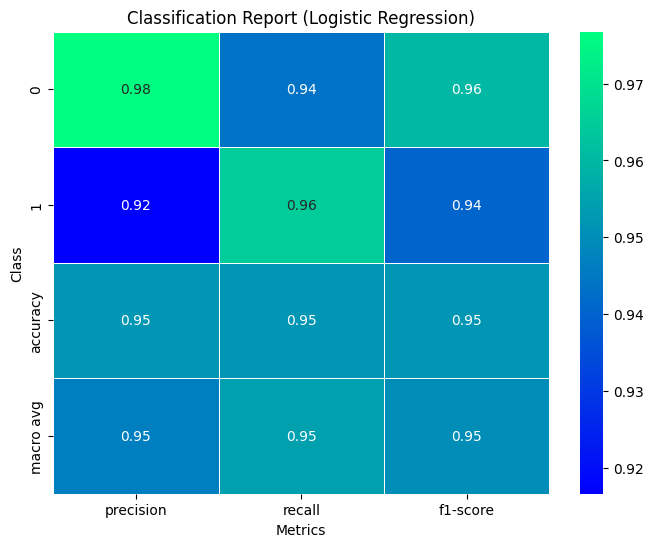


Support Vector Machine (SVM):
Accuracy (SVM): 0.6095890410958904


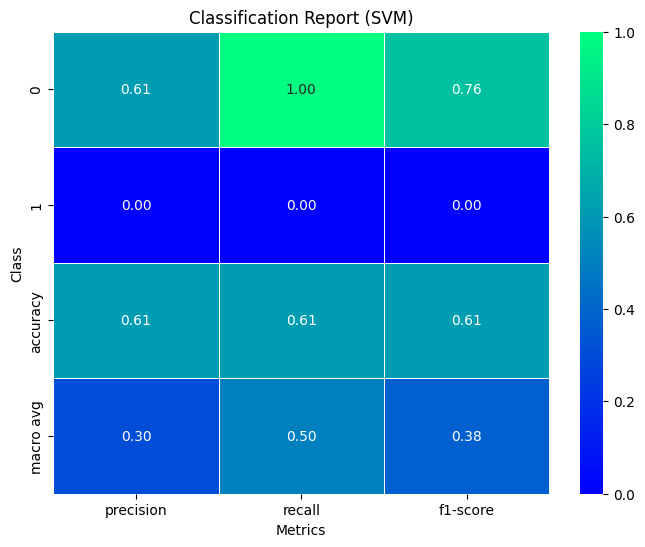


Linear SVC:
Accuracy (Linear SVC): 0.9452054794520548


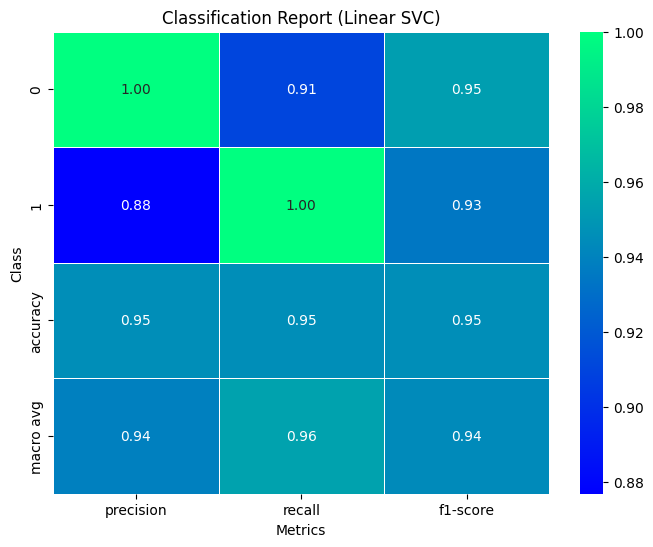


Naive Bayes Gaussian:
Accuracy (Naive Bayes Gaussian): 0.6575342465753424


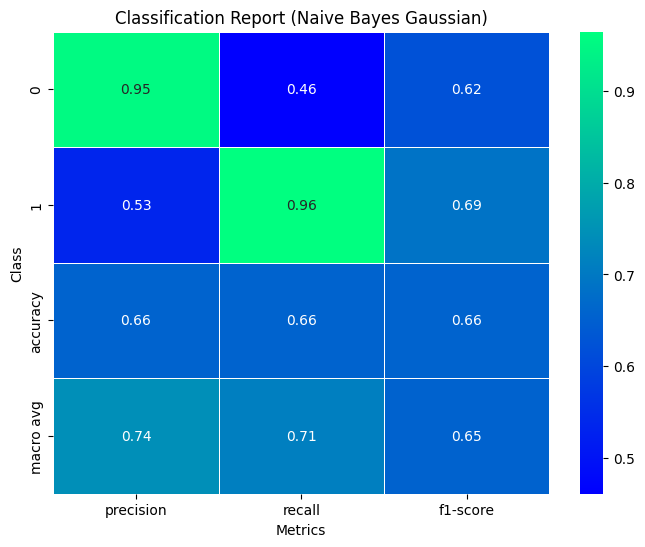

In [95]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
lr = LogisticRegression(max_iter=1000)
lr.fit(xtrain, ytrain)

pred_lr = lr.predict(xtest)
percentage_fake_followers_lr = (sum(pred_lr) / len(pred_lr)) * 100
print("Percentage of fake followers (Logistic Regression):", percentage_fake_followers_lr)


svm = SVC(max_iter=1000, C=1.0) 
svm.fit(xtrain, ytrain)
pred_svm = svm.predict(xtest)
percentage_fake_followers_svm = (sum(pred_svm) / len(pred_svm)) * 100
print("\nPercentage of fake followers (SVM):", percentage_fake_followers_svm)


linear_svc = LinearSVC(max_iter=1000)
linear_svc.fit(xtrain, ytrain)
pred_linear_svc = linear_svc.predict(xtest)

percentage_fake_followers_linear_svc = (sum(pred_linear_svc) / len(pred_linear_svc)) * 100
print("\nPercentage of fake followers (Linear SVC):", percentage_fake_followers_linear_svc)


nb = GaussianNB()
nb.fit(xtrain, ytrain)
pred_nb = nb.predict(xtest)
percentage_fake_followers_nb = (sum(pred_nb) / len(pred_nb)) * 100
print("\nPercentage of fake followers (Naive Bayes Gaussian):", percentage_fake_followers_nb)

accuracy_lr = accuracy_score(ytest, pred_lr)
accuracy_svm = accuracy_score(ytest, pred_svm)
accuracy_linear_svc = accuracy_score(ytest, pred_linear_svc)
accuracy_nb = accuracy_score(ytest, pred_nb)

# using a function to plot classification report of these models
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='winter', fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Class')
    plt.show()


print("\nLogistic Regression:")
print("Accuracy (Logistic Regression):", accuracy_lr)
plot_classification_report(ytest, pred_lr, "Classification Report (Logistic Regression)")


print("\nSupport Vector Machine (SVM):")
print("Accuracy (SVM):", accuracy_svm)
plot_classification_report(ytest, pred_svm, "Classification Report (SVM)")


print("\nLinear SVC:")
print("Accuracy (Linear SVC):", accuracy_linear_svc)
plot_classification_report(ytest, pred_linear_svc, "Classification Report (Linear SVC)")


print("\nNaive Bayes Gaussian:")
print("Accuracy (Naive Bayes Gaussian):", accuracy_nb)
plot_classification_report(ytest, pred_nb, "Classification Report (Naive Bayes Gaussian)");


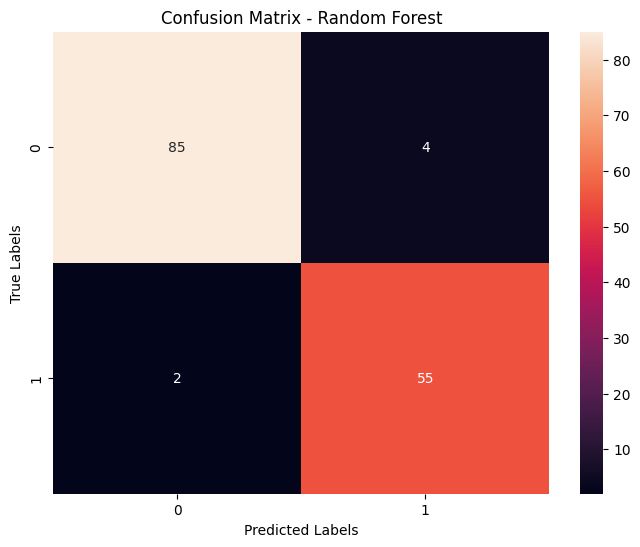

In [96]:
conf_matrix_rf = confusion_matrix(ytest, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='rocket', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Testing on a data that has more than 100% real followers

In [97]:
real=pd.read_csv("real.csv")
real.drop(columns=["Unnamed: 0"], inplace=True)
real

,numsinusername,posts,followers,following,ratio,biolength
0,0,5,179,3883,21.692737,68
1,0,67,67,694,10.358209,65
2,0,34,680,305,0.448529,32
3,1,1100,486,646,1.329218,105
4,2,0,458,2429,5.303493,113
5,0,5,179,3883,21.692737,68
6,0,67,67,694,10.358209,65
7,0,34,680,305,0.448529,32
8,1,1100,486,646,1.329218,105
9,2,0,458,2429,5.303493,113


In [98]:
rf.predict(real)

rfpred = rf.predict(real)
percentage_fake_followers = (sum(rfpred) / len(rfpred)) * 100
print("Percentage of fake followers:", percentage_fake_followers)


Percentage of fake followers: 0.0


See :)) our model has predict right.

In [99]:
fake=pd.read_csv("fakes.csv")
fake.drop(columns=["Unnamed: 0"], inplace=True)
fake #this dataset has all 80% fake followers

,numsinusername,posts,followers,following,ratio,biolength
0,3.00,312,261,234,0.896552,0.00
1,5.00,0,22,12231,555.954545,0.00
2,0.38,44,66,75,4.000000,1.14
3,0.57,4,96,339,9.000000,3.53
4,0.57,0,57,73,7.000000,1.28
5,0.27,2,150,487,2.000000,3.25
6,5.00,0,22,12231,555.954545,0.00
7,0.38,44,66,75,4.000000,1.14
8,0.57,4,96,339,9.000000,3.53
9,0.57,0,57,73,7.000000,1.28


In [100]:
rfpred = rf.predict(fake)
percentage_fake_followers = (sum(rfpred) / len(rfpred)) * 100
print("Percentage of fake followers:", percentage_fake_followers)


Percentage of fake followers: 72.72727272727273


In [101]:
newdata=pd.read_csv("newtest.csv") #This data set has 4 fake followers our of 11 which is 36.6% lets see how much our model shows.
newdata.drop(columns=["Unnamed: 0"], inplace=True)
newdata

,numsinusername,posts,followers,following,ratio,biolength
0,0.00,5,179,3883,21.692737,68.00
1,0.00,67,67,694,10.358209,65.00
2,0.00,34,680,305,0.448529,32.00
3,1.00,1100,486,646,1.329218,105.00
4,2.00,0,458,2429,5.303493,113.00
5,3.00,312,261,234,0.896552,0.00
6,5.00,0,22,12231,555.954545,0.00
7,0.38,44,66,75,4.000000,1.14
8,0.57,4,96,339,9.000000,3.53
9,0.57,0,57,73,7.000000,1.28


In [102]:
rfpred = rf.predict(newdata)
percentage_fake_followers = (sum(rfpred) / len(rfpred)) * 100
print("Percentage of fake followers:", percentage_fake_followers)


Percentage of fake followers: 36.36363636363637


As our model has achieved accurate predictions, we can proceed to save it for integration into our Python application for real-time data fetching.

In [29]:
import pickle
with open('RF.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [30]:
%run getlist.py
# this script will ask username we want to check, run and enter username in terminal below

Enter the Instagram username you want to scrape followers of:  elvish_yadav


[Info] - Instagram did not require to accept cookies this time.
[Info] - Logging in...
[Info] - Scraping followers for elvish_yadav...
[Info] - Loading timeout reached. Stopping scraping.
[Info] - Saving followers for elvish_yadav...


This Script has saved followers of entered username to txt file now we will run another script that will fetch data of these followers.

In [33]:
%run bs.py

Loaded session from C:\Users\Riseu\AppData\Local\Instaloader\session-vltcheckfacility.


JSON Query to api/v1/users/web_profile_info/?username=: 404 Not Found [retrying; skip with ^C]


Error fetching data for reels: Profile reels does not exist.
Error fetching data for about: Profile about does not exist.


JSON Query to api/v1/users/web_profile_info/?username=blog: 404 Not Found [retrying; skip with ^C]
JSON Query to api/v1/users/web_profile_info/?username=blog: 404 Not Found [retrying; skip with ^C]
JSON Query to api/v1/users/web_profile_info/?username=: 404 Not Found [retrying; skip with ^C]
JSON Query to web/search/topsearch/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to web/search/topsearch/: HTTP error code 401. [retrying; skip with ^C]
JSON Query to web/search/topsearch/: HTTP error code 401. [retrying; skip with ^C]


Error fetching data for blog: JSON Query to web/search/topsearch/: HTTP error code 401.


JSON Query to api/v1/users/web_profile_info/?username=prince_osian__: HTTPSConnectionPool(host='i.instagram.com', port=443): Max retries exceeded with url: /api/v1/users/web_profile_info/?username=prince_osian__ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000024D8F2EF080>, 'Connection to i.instagram.com timed out. (connect timeout=300.0)')) [retrying; skip with ^C]
JSON Query to api/v1/users/web_profile_info/?username=cutekamina3228: HTTPSConnectionPool(host='i.instagram.com', port=443): Max retries exceeded with url: /api/v1/users/web_profile_info/?username=cutekamina3228 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000024D8F2CAE70>, 'Connection to i.instagram.com timed out. (connect timeout=300.0)')) [retrying; skip with ^C]
JSON Query to api/v1/users/web_profile_info/?username=king_0f_samastipur_king: HTTPSConnectionPool(host='i.instagram.com', port=443): Max retries exceeded with url: /api/v1/users/web_profile_i

Error fetching data for : JSON Query to web/search/topsearch/: HTTP error code 401.


JSON Query to api/v1/users/web_profile_info/?username=inam_gujjar0786: HTTPSConnectionPool(host='i.instagram.com', port=443): Max retries exceeded with url: /api/v1/users/web_profile_info/?username=inam_gujjar0786 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000024D8C7B0B00>, 'Connection to i.instagram.com timed out. (connect timeout=300.0)')) [retrying; skip with ^C]


Data saved to 'fetched_data.csv'.


This script has saved the data to fetched_data.csv in the format of our test data. Now we will load that real instagram data and see results with our model.

In [37]:
realdata= pd.read_csv("fetched_data.csv")
rf.predict(realdata)

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

Percentage of fake followers: 40.67796610169492 %


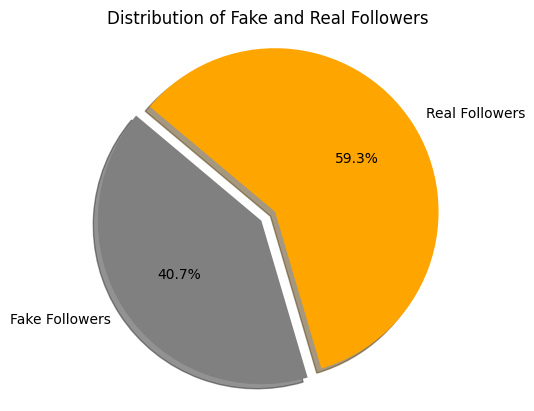

In [50]:
#calculating percentage of fake accounts
rfpred = rf.predict(realdata)
percentage = (sum(rfpred) / len(rfpred)) * 100
print("Percentage of fake followers:", percentage,"%")
labels = ['Fake Followers', 'Real Followers']
sizes = [percentage_fake_followers, 100 - percentage_fake_followers]
colors = ['grey', 'orange']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Fake and Real Followers')
plt.show()

In [41]:
#It appears that Elvish Yadav's account has approximately 40% fake followers :)

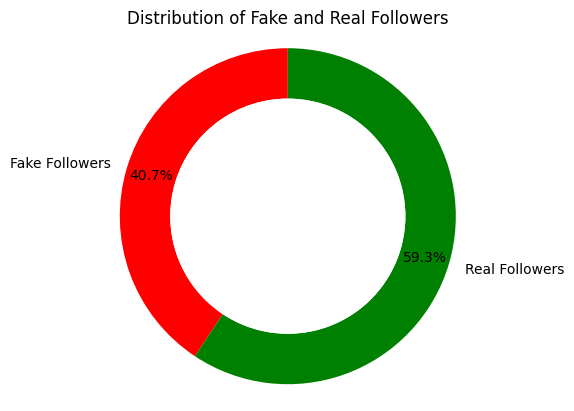

In [82]:
# Createing a donut chart
labels = ['Fake Followers', 'Real Followers']
sizes = [percentage, 100 - percentage]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Fake and Real Followers')
plt.show()


Thank you for reviewing my project :)  I have created a Python Flask app that you can install and run on your computer to check fake followers of any Instagram account.